<a href="https://colab.research.google.com/github/evgeny-kolonsky/Lab4/blob/main/SP/Lab4_Prism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lab4 - Spectrometer. Prism measurements

v.0.1.3

$$
n(\theta) = 2 \sin\left(30^\circ + \frac{\theta}{2}\right)
\tag{1}
$$

$$
n(\lambda) = A  + \frac{B}{\lambda^2}
\tag{2}
$$



Fitting aproach:
1. For known helium and mercury measurements $(\lambda, \theta)$ calculate $n(\theta)$  with eq(1).
2. Suggest that $x = \frac{1}{\lambda^2}$ and $ y = n$ and fit eq(2) to find $A$ and $B$ constants with their errors.
3. Measure angles $\theta$ for hydrogen. Calculate $n(\theta)$ with eq(1).
4. Find wavelengths of hydrogen  for fitted $B,C$ constants with eq(3):
$$
\frac{1}{\lambda^2} = \frac{n - A}{B}
\tag{3}
$$
5. Esitmate errors for $\lambda$ as propagated errors from fit parameters $A$ and $B$.


In [1]:
# ! pip install uncertainties
# ! pip install lmfit

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress
from uncertainties import ufloat, unumpy, umath
from scipy.optimize import curve_fit
from lmfit import minimize, Parameters


B = 1.59305+/-0.00024, C = (9.14+/-0.06)e+03 1/nm2
Hydrogen wavelength: 433.5+/-1.9
Hydrogen wavelength: 487.8+/-2.3
Hydrogen wavelength: 655+/-4


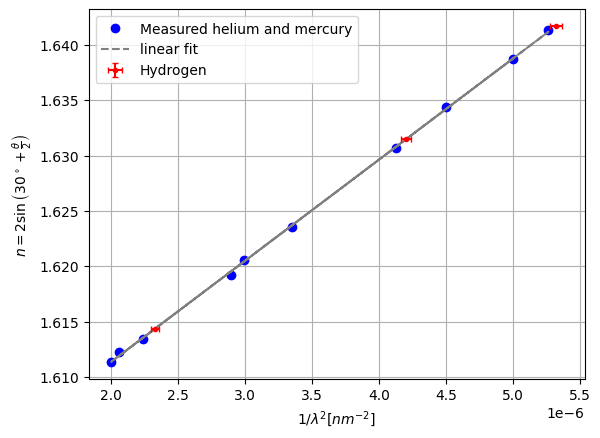

In [3]:
data = '''
# wavelength theta
# helium
447.15 50.04
471.31 49.61
492.19 49.24
587.56 48.11
667.82 47.55
706.52 47.35
# mercury
435.83 50.30
546.07 48.54
578.0 48.25 # averaged
697 47.44
'''
lmd, theta = np.genfromtxt(data.splitlines()).T
theta *= np.pi/ 180
x = 1/lmd**2
n = 2 * np.sin(np.pi/6 + theta/2)
plt.plot(x, n, 'o', color='blue', label='Measured helium and mercury')
fit = linregress(x, n)
B, C = fit.intercept, fit.slope
B_err, C_err = fit.intercept_stderr, fit.stderr
uB = ufloat(B, B_err)
uC = ufloat(C, C_err)
print(f'B = {uB}, C = {uC} 1/nm2')
plt.plot(x, B + C * x, '--', color='gray', label=fr'linear fit')

hydrogen = '''
434.0 50.34
486.1 49.32
656.3 47.64
'''
_, theta = np.genfromtxt(hydrogen.splitlines()).T
theta *= np.pi/ 180
n = 2 * np.sin(np.pi/6 + theta/2)

x = (n - uB) / uC
xvalues = [x_.n for x_ in x]
xerrors = [x_.s for x_ in x]
plt.errorbar(xvalues, n, yerr=0, xerr=xerrors, color='red', fmt='.', ls='',
             capsize=2, label='Hydrogen')

lambda_h = 1/ unumpy.sqrt(x)

for l in lambda_h:
    print(f'Hydrogen wavelength: {l}')


plt.ylabel(r'$n = 2 \sin\left(30^\circ + \frac{\theta}{2}\right)$')
plt.xlabel('1/$\\lambda^2 [{nm}^{-2}]$')
plt.legend()
plt.grid()


# Prisms 1- 6

A = 1.59293+/-0.00029, B = (9.23+/-0.07)e+03 1/nm2
A = 1.5942+/-0.0004, B = (8.97+/-0.10)e+03 1/nm2
A = 1.6846+/-0.0018, B = (1.24+/-0.05)e+04 1/nm2
A = 1.5934+/-0.0004, B = (9.09+/-0.11)e+03 1/nm2
A = 1.6834+/-0.0008, B = (1.322+/-0.021)e+04 1/nm2
A = 1.6842+/-0.0005, B = (1.303+/-0.015)e+04 1/nm2


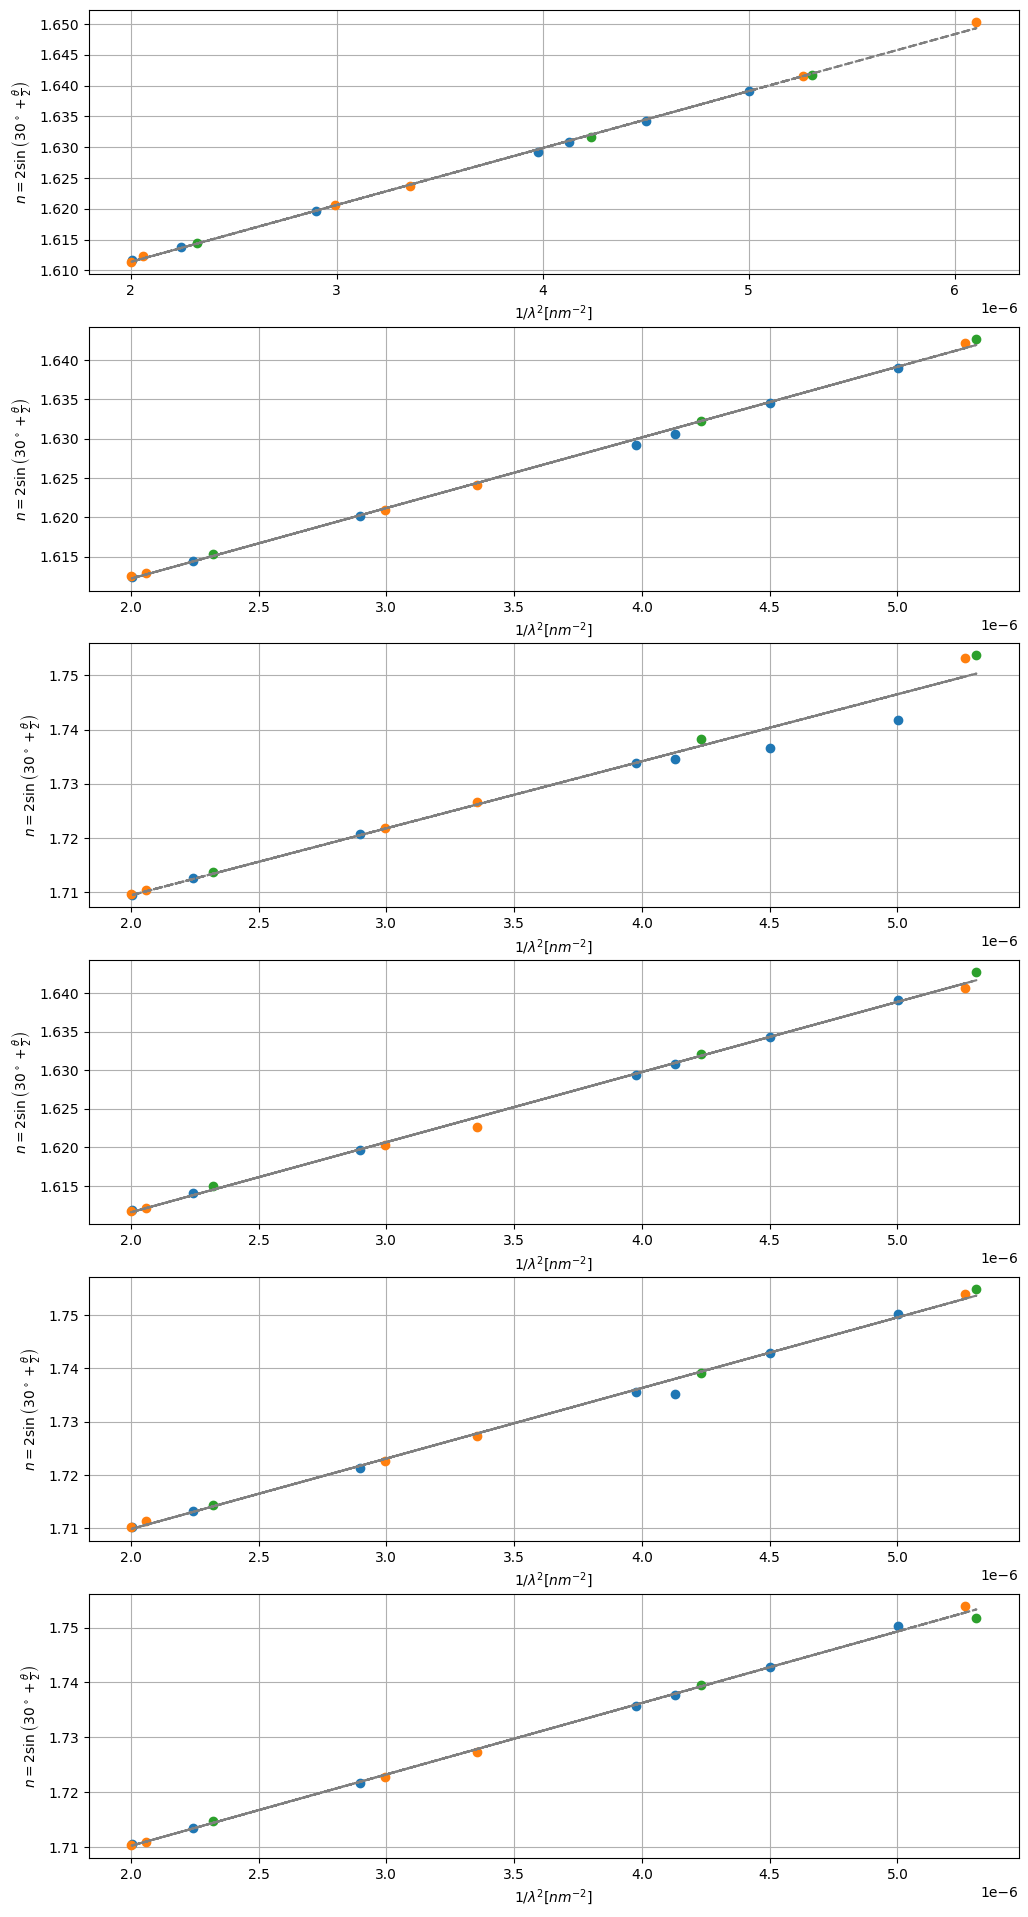

In [4]:
data = '''
#Helium
1 447.1	50.08	50.07	61.13	50.08	62.11	62.12
1 471.3	49.59	49.62	60.53	49.6	61.26	61.25
1 492.1	49.25	49.23	60.28	49.25	60.36	60.65
1 501.5	49.09	49.09	60.2	49.11	60.40	60.42
1 587.5	48.15	48.21	58.71	48.16	58.79	58.82
1 667.9	47.59	47.65	57.8	47.61	57.89	57.9
1 706.5	47.38	47.45	57.45	47.40	57.56	57.57
#Mercury
2 404.7	51.21	 NaN	  NaN	  NaN	  NaN	  NaN
2 435.8	50.33	50.38	62.48	50.24	62.56	62.56
2 546.1	48.55	48.59	59.38	48.45	59.47	59.46
2 578.0	48.25	48.28	58.84	48.22	58.93	58.94
2 697.0	47.45	47.5	57.56	47.43	57.67	57.63
2 707.0	47.36	47.47	57.48	47.39	57.55	57.55
#Hydrogen
3 434.0	50.34	50.44	62.53	50.44	62.67	62.29
3 486.1	49.33	49.39	60.72	49.38	60.82	60.86
3 656.3	47.65	47.74	57.93	47.7	58.01	58.05
'''
lamp, lmd, *thetas = np.genfromtxt(data.splitlines()).T

fig, ax = plt.subplots(6, 1, figsize=(12,24))
for prism in range(6):
  axx = ax[prism]
  lamp_ce = {1:'He', 2:'Hg', 3:'H'}
  theta = thetas[prism] * np.pi/ 180
  mask =  (np.isnan(theta) == False)
  x = 1 / lmd[mask]**2
  w = lmd[mask]
  n = 2 * np.sin(np.pi/6 + theta[mask]/2)
  for i in np.unique(lamp):
    axx.plot(x[lamp[mask]==i], n[lamp[mask]==i], 'o',  label=f'{lamp_ce[i]}')
  fit = linregress(x, n)
  A, B = fit.intercept, fit.slope
  A_err, B_err = fit.intercept_stderr, fit.stderr
  uA = ufloat(A, A_err)
  uB = ufloat(B, B_err)
  print(f'A = {uA}, B = {uB} 1/nm2')
  axx.plot(x, A + B * x, '--', color='gray', label=fr'linear fit')



  #x = (n - uA) / uB
  #lambda_h = 1/ unumpy.sqrt(x)
  #for ix, l in enumerate(lambda_h):
  #    print(f'Wavelength: nominal and estimated {lmd[mask][ix]} nm:   {l} nm')


  axx.set_ylabel(r'$n = 2 \sin\left(30^\circ + \frac{\theta}{2}\right)$')
  axx.set_xlabel('1/$\\lambda^2 [{nm}^{-2}]$')
  #axx.legend()
  axx.grid()


# $\chi^2$ test

Let's suggest we have accurate wavelengths $\lambda$ known and $\theta$ measured and $n(\theta)$ calculated acc.eq(1). Uncertainties in $n$ are found as error propagation of $\theta$. Uncertainty in $\theta$ we suggest to be five resolutions of digital counter, i.e. $\pm 0.05^\circ$ (pessimistic or reasonable).  

Text(0, 0.5, 'Refraction index')

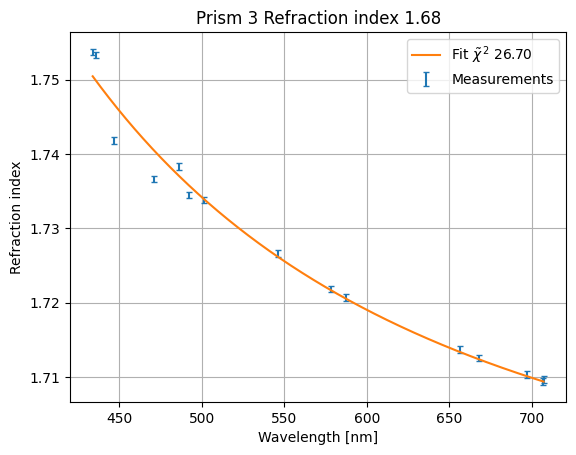

In [5]:
theta_err = 0.05 / 180 * np.pi
lamp, lmd, *thetas = np.genfromtxt(data.splitlines()).T
prism = 3
theta = thetas[prism-1] * np.pi/ 180
mask =  (np.isnan(theta) == False)

def refraction_index(deviation_angle):
  return 2* umath.sin(np.pi/6 + deviation_angle/2)

n = np.array([refraction_index(ufloat(th, theta_err)) for th in theta[mask]])

waves = lmd[mask]

def residual(params, x, data, uncertainty):
    A = params['A']
    B = params['B']

    model = A + B / x**2

    return (data-model) / uncertainty


params = Parameters()
params.add('A', value=1.5)
params.add('B', value=1e3)

values = [x.n for x in n]
errors = [x.s for x in n]

fit = minimize(residual, params, args=(waves, values, errors))

wdense = np.linspace(waves.min(), waves.max(), 1000)
A = fit.params['A'].value
A_err = fit.params['A'].stderr
uA = ufloat(A, A_err)
B = fit.params['B'].value
plt.errorbar(waves, values, errors,  fmt='', ls='', capsize=2, label='Measurements')
plt.plot(wdense, A + B / wdense**2, label=fr'Fit $\tilde\chi^2$ {fit.redchi:.2f}')
plt.title(f'Prism {prism} Refraction index {A:.2f}')
plt.grid()
plt.legend()
plt.xlabel('Wavelength [nm]')
plt.ylabel('Refraction index')


Conclusion:

prisms 1, 2, 4 - data fits model with incertainty 0.05 grad.

prism 3 - bad data

prism 5, 6 - doubt

# Prims 3 remeasured

A = 1.6849+/-0.0006, B = (1.292+/-0.016)e+04 1/nm2
Wavelength: nominal and estimated 447.1 nm:   445.2+/-3.3 nm
Wavelength: nominal and estimated 471.3 nm:   471+/-4 nm
Wavelength: nominal and estimated 492.1 nm:   494+/-4 nm
Wavelength: nominal and estimated 501.5 nm:   504+/-4 nm
Wavelength: nominal and estimated 587.5 nm:   590+/-6 nm
Wavelength: nominal and estimated 667.9 nm:   667+/-8 nm
Wavelength: nominal and estimated 706.5 nm:   702+/-9 nm


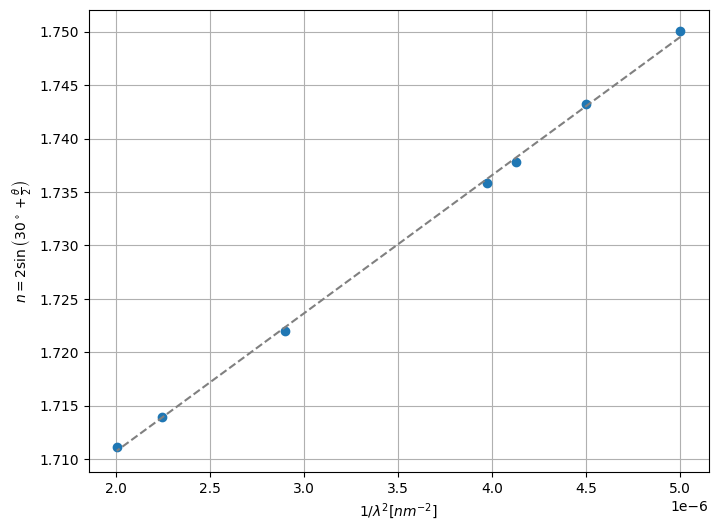

In [12]:
data = '''
#Helium
1 447.1	62.1
1 471.3	61.29
1 492.1	60.66
1 501.5	60.435
1 587.5	58.86
1 667.9	57.96
1 706.5	57.645
'''
lamp, lmd, *thetas = np.genfromtxt(data.splitlines()).T

fig, ax = plt.subplots(1, 1, figsize=(8,6))
prism = 0
lamp_ce = {1:'He', 2:'Hg', 3:'H'}
theta = thetas[prism] * np.pi/ 180
mask =  (np.isnan(theta) == False)
x = 1 / lmd[mask]**2
w = lmd[mask]
n = 2 * np.sin(np.pi/6 + theta[mask]/2)
for i in np.unique(lamp):
  ax.plot(x[lamp[mask]==i], n[lamp[mask]==i], 'o',  label=f'{lamp_ce[i]}')
fit = linregress(x, n)
A, B = fit.intercept, fit.slope
A_err, B_err = fit.intercept_stderr, fit.stderr
uA = ufloat(A, A_err)
uB = ufloat(B, B_err)
print(f'A = {uA}, B = {uB} 1/nm2')
ax.plot(x, A + B * x, '--', color='gray', label=fr'linear fit')



x = (n - uA) / uB
lambda_h = 1/ unumpy.sqrt(x)
for ix, l in enumerate(lambda_h):
    print(f'Wavelength: nominal and estimated {lmd[mask][ix]} nm:   {l} nm')


ax.set_ylabel(r'$n = 2 \sin\left(30^\circ + \frac{\theta}{2}\right)$')
ax.set_xlabel('1/$\\lambda^2 [{nm}^{-2}]$')
#axx.legend()
ax.grid()


Text(0, 0.5, 'Refraction index')

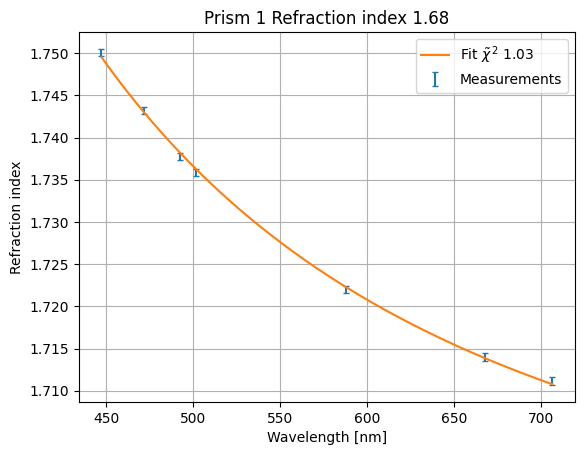

In [15]:
theta_err = 0.05 / 180 * np.pi
lamp, lmd, *thetas = np.genfromtxt(data.splitlines()).T
prism = 1
theta = thetas[prism-1] * np.pi/ 180
mask =  (np.isnan(theta) == False)

def refraction_index(deviation_angle):
  return 2* umath.sin(np.pi/6 + deviation_angle/2)

n = np.array([refraction_index(ufloat(th, theta_err)) for th in theta[mask]])

waves = lmd[mask]

def residual(params, x, data, uncertainty):
    A = params['A']
    B = params['B']

    model = A + B / x**2

    return (data-model) / uncertainty


params = Parameters()
params.add('A', value=1.5)
params.add('B', value=1e3)

values = [x.n for x in n]
errors = [x.s for x in n]

fit = minimize(residual, params, args=(waves, values, errors))

wdense = np.linspace(waves.min(), waves.max(), 1000)
A = fit.params['A'].value
A_err = fit.params['A'].stderr
uA = ufloat(A, A_err)
B = fit.params['B'].value
plt.errorbar(waves, values, errors,  fmt='', ls='', capsize=2, label='Measurements')
plt.plot(wdense, A + B / wdense**2, label=fr'Fit $\tilde\chi^2$ {fit.redchi:.2f}')
plt.title(f'Prism {prism} Refraction index {A:.2f}')
plt.grid()
plt.legend()
plt.xlabel('Wavelength [nm]')
plt.ylabel('Refraction index')
